In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from google.colab import files

In [25]:
uploaded = files.upload()

Saving Daily Household Transactions.csv to Daily Household Transactions (1).csv


In [26]:
filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)

In [27]:
data.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [28]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns

In [29]:
imputer = SimpleImputer(strategy='mean')
data_numeric_imputed = pd.DataFrame(imputer.fit_transform(data[numeric_cols]), columns=numeric_cols)
data_non_numeric = data[non_numeric_cols].copy()

In [30]:
scaler = StandardScaler()
data_scaled_numeric = pd.DataFrame(scaler.fit_transform(data_numeric_imputed), columns=numeric_cols)


In [31]:
data_scaled = pd.concat([data_scaled_numeric, data_non_numeric], axis=1)

In [10]:
data_imputed = pd.concat([data_imputed_numeric, data[non_numeric_cols]], axis=1)

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns


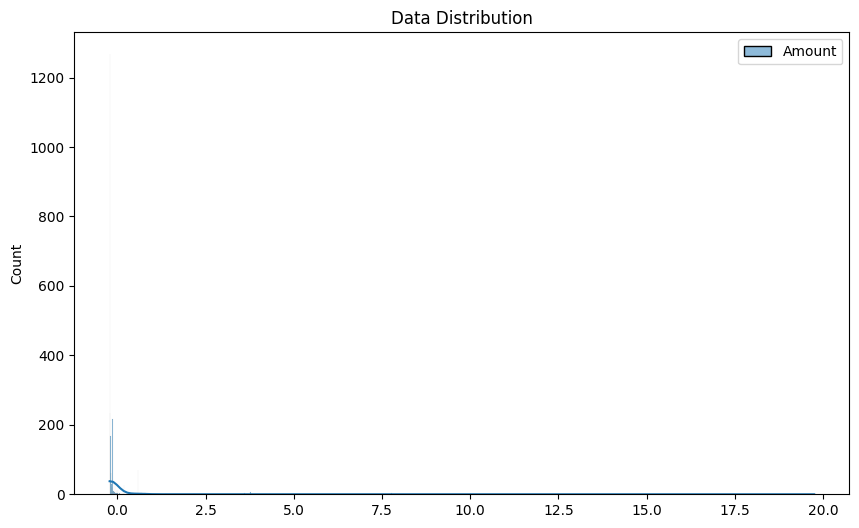

In [33]:

# Visualize data distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_scaled[numeric_cols], kde=True)
plt.title('Data Distribution')
plt.show()



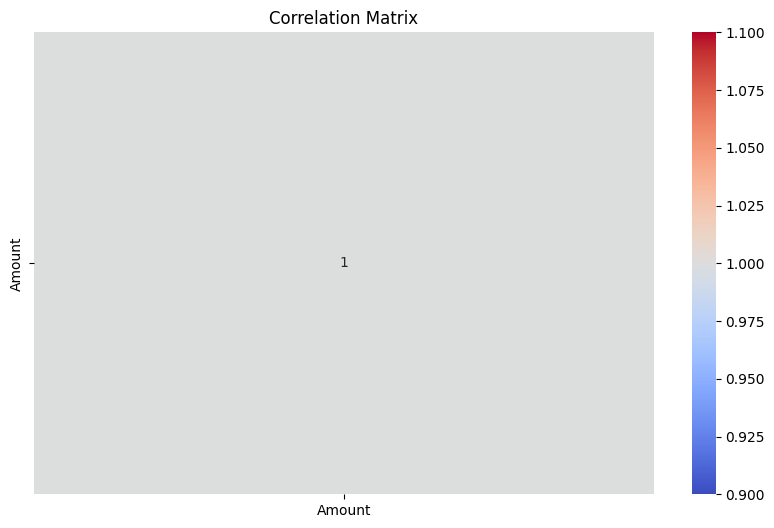

In [34]:


# Analyze patterns and correlations
plt.figure(figsize=(10, 6))
sns.heatmap(data_scaled[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [35]:
# Import necessary libraries for clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


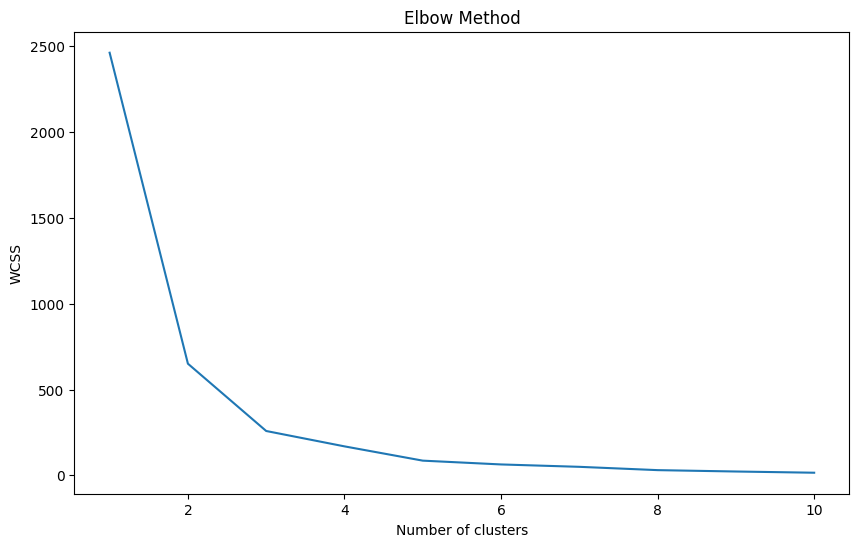

In [36]:

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_scaled_numeric)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [37]:

# Apply the K-means algorithm with the optimal number of clusters
optimal_clusters = 3  # Set based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(data_scaled_numeric)


In [38]:


# Add cluster labels to the original data
data['Cluster'] = clusters

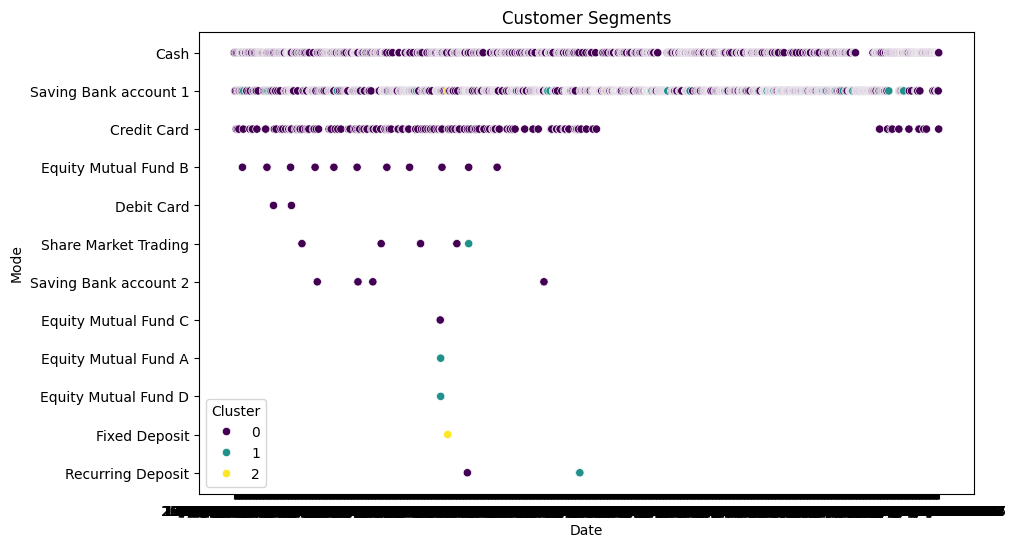

In [40]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Date', y='Mode', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.show()



In [41]:


# Analyze the characteristics of each segment
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=numeric_cols)
cluster_centers['Cluster'] = range(optimal_clusters)
cluster_centers



,Amount,Cluster
0,932.414436,0
1,58311.283846,1
2,187500.000000,2


In [42]:

# Display cluster centers and characteristics
cluster_centers.T

,0,1,2
Amount,932.414436,58311.283846,187500.0
Cluster,0.000000,1.000000,2.0
